<a href="https://colab.research.google.com/github/Nataliia5722/Machine-Learning-Spring-2021/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Multiple Linear Regression

In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import pickle
import time

In [118]:
data = pd.read_csv('https://raw.githubusercontent.com/Nataliia5722/Machine-Learning-Spring-2021/main/data.csv')
print(data.shape)

(16, 3)


In [119]:
data.head()

,Age,Weight,Blood pressure
0,60,58,117
1,61,90,120
2,74,96,145
3,57,72,129
4,63,62,132


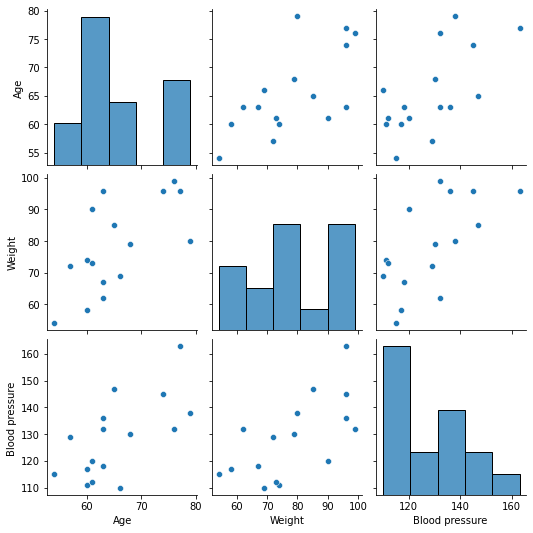

In [120]:
import seaborn as sns
sns.pairplot(data)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              16 non-null     int64
 1   Weight           16 non-null     int64
 2   Blood pressure   16 non-null     int64
dtypes: int64(3)
memory usage: 512.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


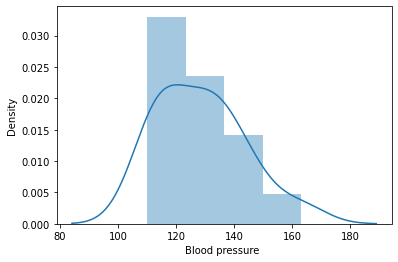

In [122]:
sns.distplot(data['Blood pressure '])

In [123]:
X = data.values[:, 0:2]  # get input values from first two columns
y = data.values[:, 2]
print(X)
print(y)

[[60 58]
 [61 90]
 [74 96]
 [57 72]
 [63 62]
 [68 79]
 [66 69]
 [77 96]
 [63 96]
 [54 54]
 [63 67]
 [76 99]
 [60 74]
 [61 73]
 [65 85]
 [79 80]]
[117 120 145 129 132 130 110 163 136 115 118 132 111 112 147 138]


In [124]:
X1_var = data[['Age','Weight']]
y_var = data['Blood pressure '] # dependent variable

In [125]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pr
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X1_var, y_var, test_size = 0.3, random_state = 0)

scaler = pr.StandardScaler()
X_train = scaler.fit_transform( X_train )
X_test = scaler.transform( X_test )
#print(X_train)
lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)
#print(X_test)


In [126]:
#yhat = lr.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

from sklearn.metrics import r2_score
print(r2_score(y_test, yhat))
print(y_test.values)
print(yhat)

0.22742051404192698 0.1085621315868388
-0.6315807060120093
[120 110 136 115 112]
[134.21049481 127.28335906 138.30864358 112.71176258 126.10125507]


In [127]:
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


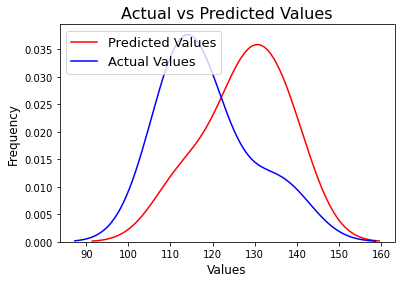

In [128]:
import seaborn as sb
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

(16, 3)
[-0.7558932800761935, -0.6168784239702269, 1.190314705407339, -1.1729378483940933, -0.3388487117582936, 0.35622556877153944, 0.07819585655960622, 1.607359273725239, -0.3388487117582936, -1.5899824167119931, -0.3388487117582936, 1.4683444176192724, -0.7558932800761935, -0.6168784239702269, -0.06081899954636039, 1.8853889859371722]
1 st Loss: 0.49999999999999994
Last Loss: 0.2414731625559152
B0: 2.7755575615628914e-17 B1: 0.4170334639492944 B2: 0.3733150374828987


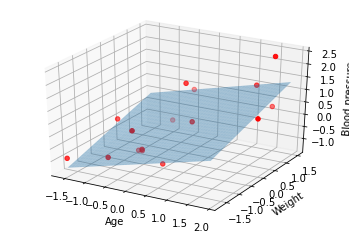

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def computeCost(x_train1, x_train2, y_origin, b00, b11, b22): # loss funtion
    sum = 0
    for i in range(len(y_origin)):
        sum += ((b00 + b11 * x_train1[i] + b22 * x_train2[i]) - y_origin[i])**2
        
    return sum / float((2 * len(y_origin)))

def gradientDescent(x_train1, x_train2, y_origin, b0, b1, b2, learning_rate):
    db0, db1, db2 = 0, 0, 0
    for i in range(len(y_origin)):
        db0 += (b0 + b1 * x_train1[i] + b2 * x_train2[i] - y_origin[i])
        db1 += (b0 + b1 * x_train1[i] + b2 * x_train2[i] - y_origin[i]) * x_train1[i]
        db2 += (b0 + b1 * x_train1[i] + b2 * x_train2[i] - y_origin[i]) * x_train2[i]
        
    # computeGradient
    db0 = db0 / float(len(y_origin))
    db1 = db1 / float(len(y_origin))
    db2 = db2 / float(len(y_origin))

    b_0 = b0 - (learning_rate * db0)
    b_1 = b1 - (learning_rate * db1)
    b_2 = b2 - (learning_rate * db2)
    return b_0, b_1, b_2

data = pd.read_csv('https://raw.githubusercontent.com/Nataliia5722/Machine-Learning-Spring-2021/main/data.csv')
print(data.shape)

age =  data.values[:, 0]
#print(age)
weight = data.values[:, 1]
blood_pressure = data.values[:, 2]

b0, b1, b2 = 0, 0 , 0
lr = 0.5

#preparing data for normalization
mean_age = np.mean(age)
mean_weight = np.mean(weight)
mean_blpr = np.mean(blood_pressure)

std_age = np.std(age)
std_weight = np.std(weight)
std_blpr = np.std(blood_pressure)

#normalization
age = [(s - mean_age) / std_age for s in age]
print(age)
weight = [(s - mean_weight) / std_weight for s in weight]
blood_pressure = [(s - mean_blpr) / std_blpr for s in blood_pressure]

# learning
print('1 st Loss: ' + str(computeCost(age, weight, blood_pressure, b0, b1, b2)))
for it in range(1000):
    b0, b1, b2 = gradientDescent(age, weight, blood_pressure, b0, b1, b2, lr)
        
print('Last Loss: ' + str(computeCost(age, weight, blood_pressure, b0, b1, b2)))
print('B0: ' + str(b0) + ' ' + 'B1: ' + str(b1) + ' ' + 'B2: ' + str(b2))

# Graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z_test = [ b0 + b1 *x  + b2 * y for x, y in zip(age, weight) ]
#print(z_test)

x, y = np.meshgrid(np.linspace(min(age), max(age)), np.linspace(min(weight), max(weight)))
z = b0 + b1 * x + b2 * y


ax.plot_surface(x, y, z, alpha=0.4)
ax.scatter(age, weight, blood_pressure, c='r', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Blood pressure')

plt.show()

In [130]:
yhat = z_test
#print(yhat)
#print(price)
SS_Residual = sum([(x-y)**2 for (x, y) in zip(blood_pressure, yhat)]    ) 
SS_Total = sum((blood_pressure-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-2-1)
print(r_squared, adjusted_r_squared)

0.5235026262901845 0.5032261423025328


###Выводы
r_squared и adjusted_r_squared для линейной регрессией реализованной в библиотеке sklearn равны соответственно 0.227, 0.108. С помощью sklearn функции: -0.63, что показывает, что модель предсказывает плохо. Если сравнить два массива, где первый - тренировочный, а второй - предсказанные значения [120 110 136 115 112]
[134 127 138 112 126], то некоторые значение отличаются больше чем на 10 единиц.
В собственной реализации показатели больше и равны 0.523, 0.503.
Из этого можем сделать вывод, что точность линейной регрессии, реализованной в библиотеке sklearn, хуже.
